In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [4]:
sales_c= df.drop(['Product Name','Product Category','Month','Year', 'Market Size', 'Marketing Expense','Month No.'],axis=1)

In [5]:
sales_c.shape

(60, 1)

In [6]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [7]:
sales_c['Sales'].sum()

45599092

Text(0.5, 1.0, 'Product C')

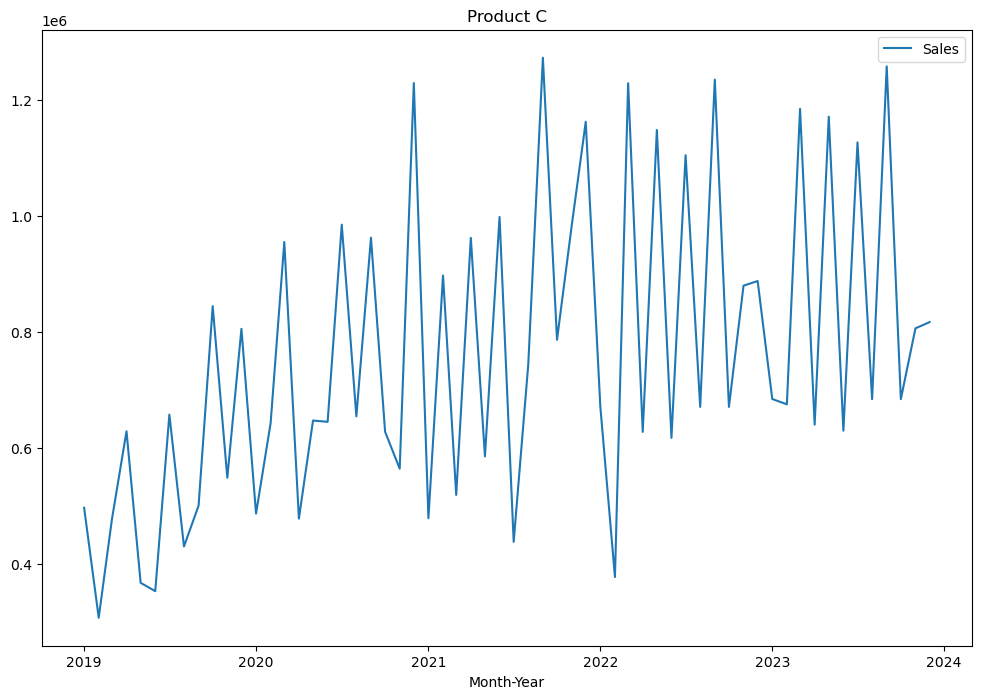

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c)
plt.title('Product C')

In [9]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adf_test(sales_c)

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


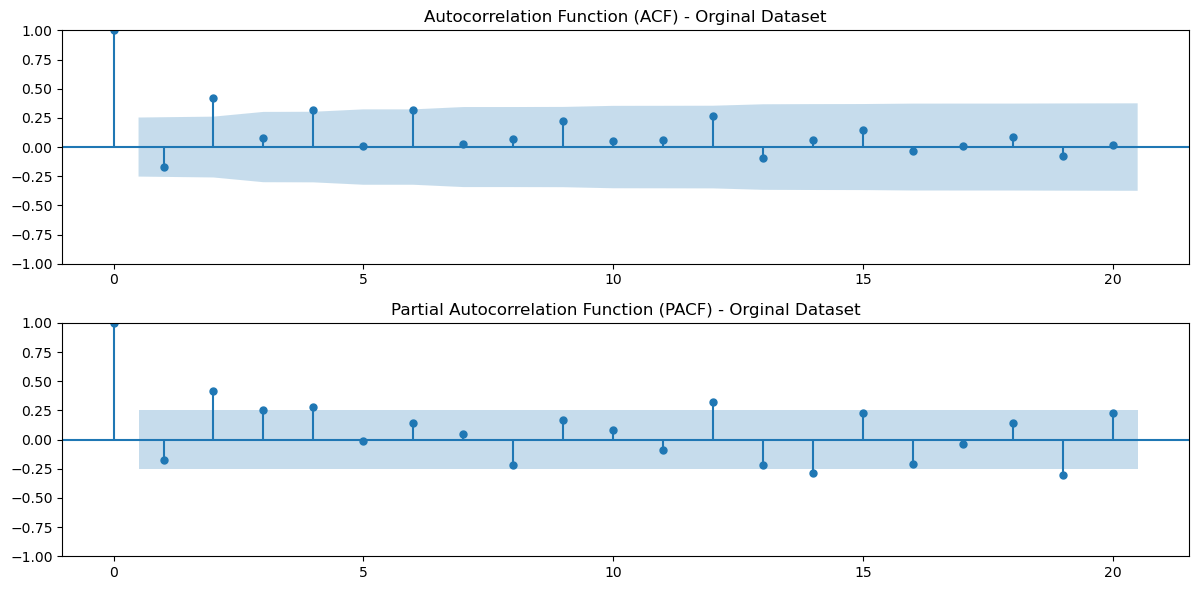

In [11]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [12]:
train= sales_c[:57]
test=sales_c[57:]

In [13]:
print(len(train),len(test))

57 3


In [14]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(3):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q))
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_c)-1))
        mae = mean_absolute_error(test, pred)
        mape = np.mean(np.abs((test - pred) / test)) * 100
        mse=mean_squared_error(test, pred)
        rmse = np.sqrt(mean_squared_error(test, pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [15]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic            mae           mse           rmse
7   2  1  1574.196478  1584.411735   87643.711644  1.539417e+10  124073.234800
8   2  2  1575.647821  1587.906129   93785.899113  1.408612e+10  118684.969151
10  3  1  1575.987144  1588.245452   92360.722304  1.430523e+10  119604.490060
12  4  0  1576.402620  1588.660928   84400.111110  1.978990e+10  140676.566750
5   1  2  1576.685780  1586.901037  103257.362810  1.087928e+10  104303.763772
13  4  1  1577.128450  1591.429809   85588.828545  1.558605e+10  124844.086064
11  3  2  1577.614902  1591.916261   93425.731943  2.060024e+10  143527.854067
14  4  2  1578.317297  1594.661707   89504.522654  2.041622e+10  142885.323872
15  5  0  1578.344122  1592.645481   79966.983316  1.888444e+10  137420.654515
16  5  1  1578.762009  1595.106420   81259.975141  1.741468e+10  131964.698376
17  5  2  1580.113962  1598.501423   94291.394584  2.147808e+10  146554.016977
9   3  0  1580.390783  1590.606039   86191.195498  1

In [16]:
#combination p=(0,1,2,3,4,5) d=0 q=(0,1,2) must be tested with accuracy metrics and aic

In [17]:
#param = [(0,0,0),(0,0,1),(0,0,2),(1,0,0),(1,0,1),(1,0,2),(2,0,0), (2,0,1), (2,0,2),(3,0,0),(3,0,1),(3,0,2),(4,0,0),(4,0,1),(4,0,2),(5,0,0),(5,0,1),(5,0,2)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    # Calculate MAPE manually
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [18]:
m_arima= ARIMA (train, order=(2,0,1))
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   57
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -782.098
Date:                Thu, 09 May 2024   AIC                           1574.196
Time:                        16:06:14   BIC                           1584.412
Sample:                    01-01-2019   HQIC                          1578.166
                         - 09-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.595e+05   2.22e+05      3.422      0.001    3.24e+05    1.19e+06
ar.L1          0.4128      0.181      2.279      0.023       0.058       0.768
ar.L2          0.5570      0.161      3.460      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

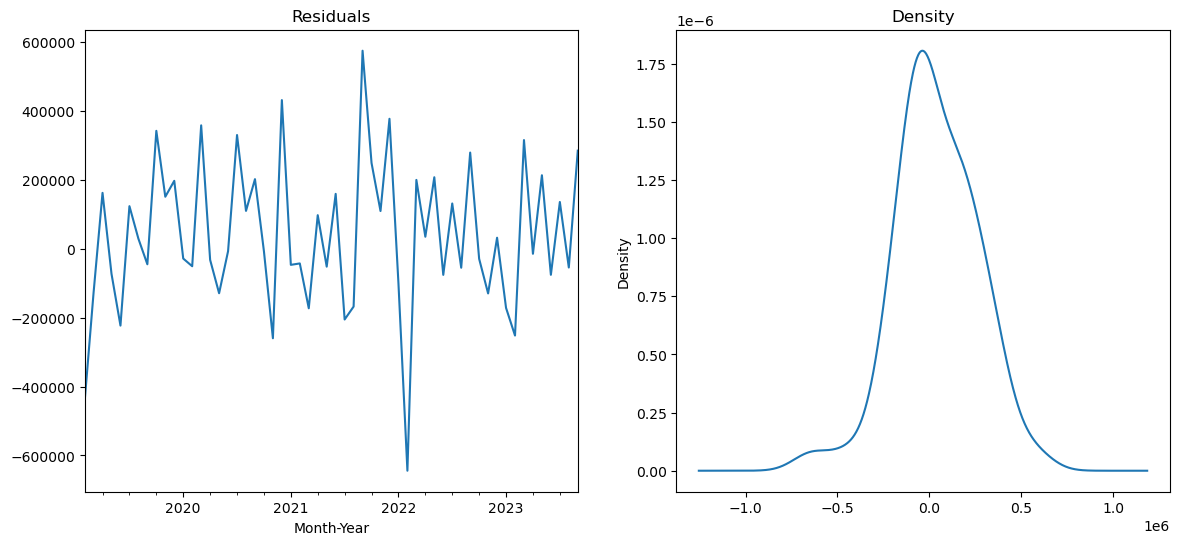

In [19]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show

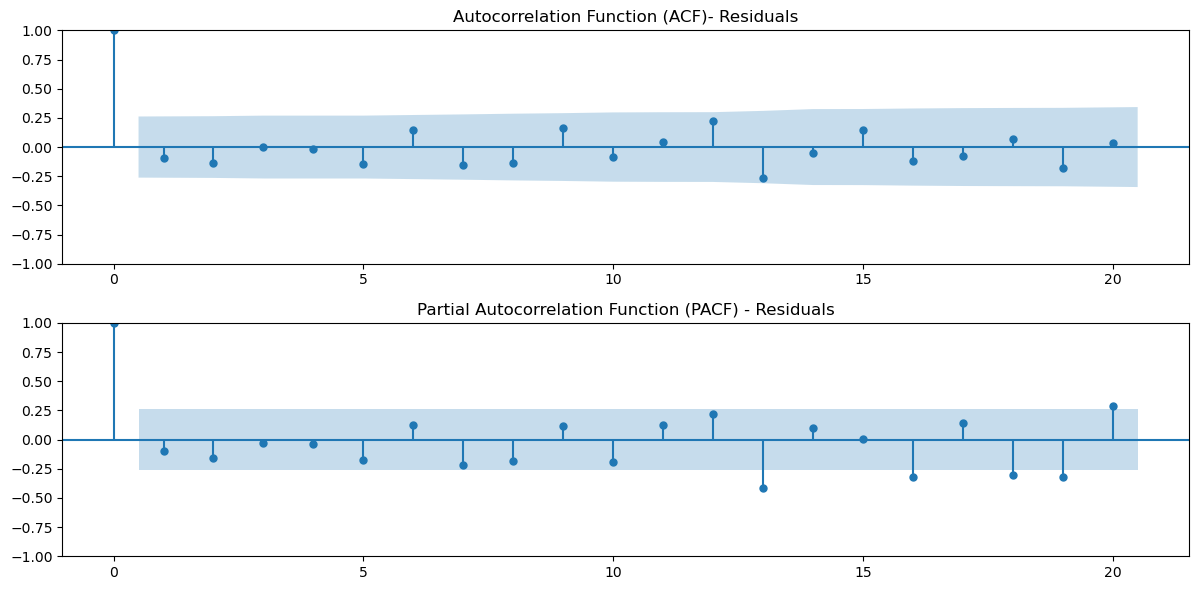

In [20]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

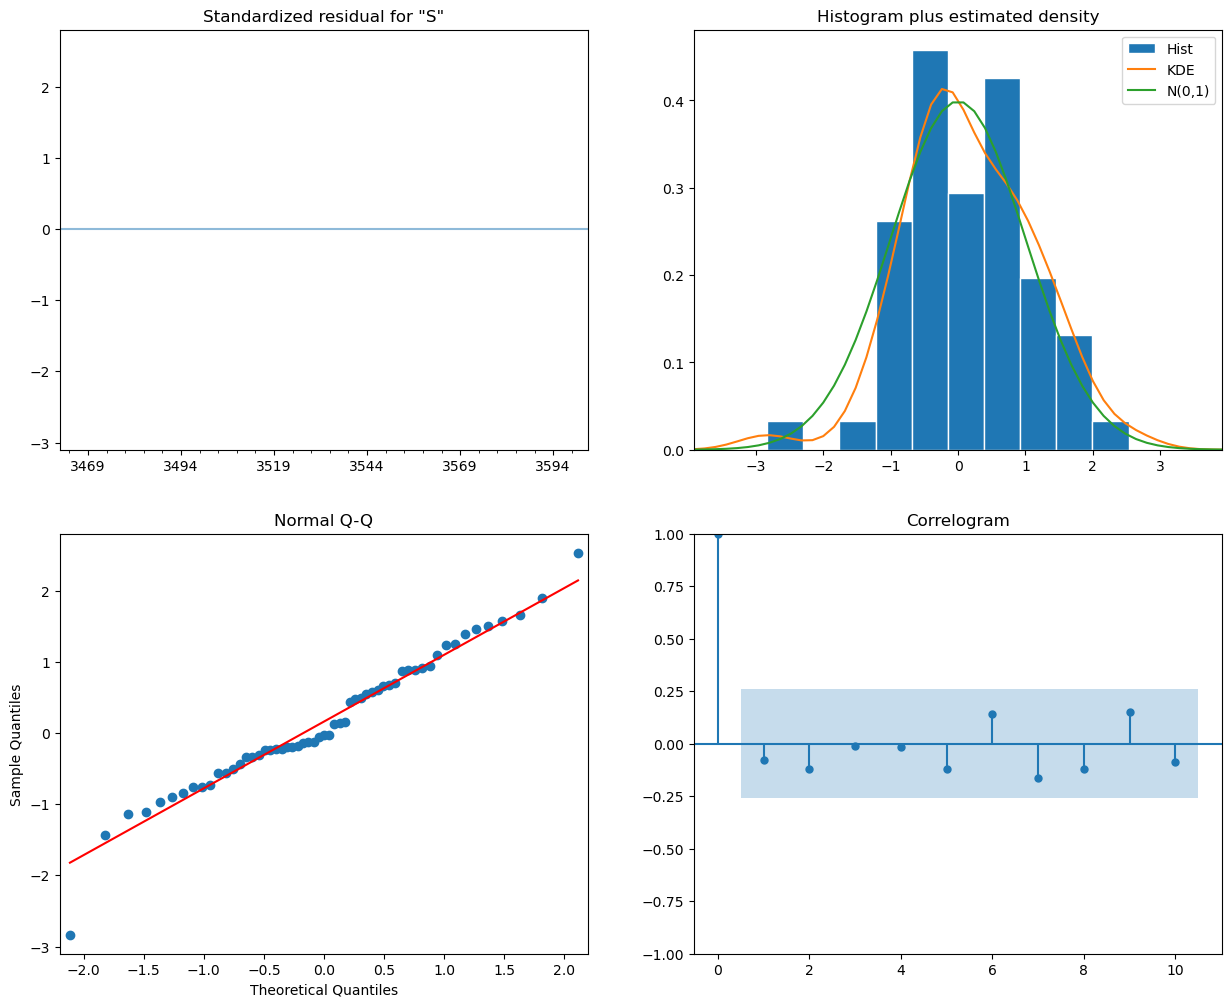

In [21]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [22]:
#pred=model.forecast(steps= len(test))
#sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_c.plot()

In [23]:
pred=model_arima.predict(start=len(train), end=(len(sales_c)-1), dynamic = True)
sales_c['Forecast_ARIMA']=[None]*len(train) + list(pred)

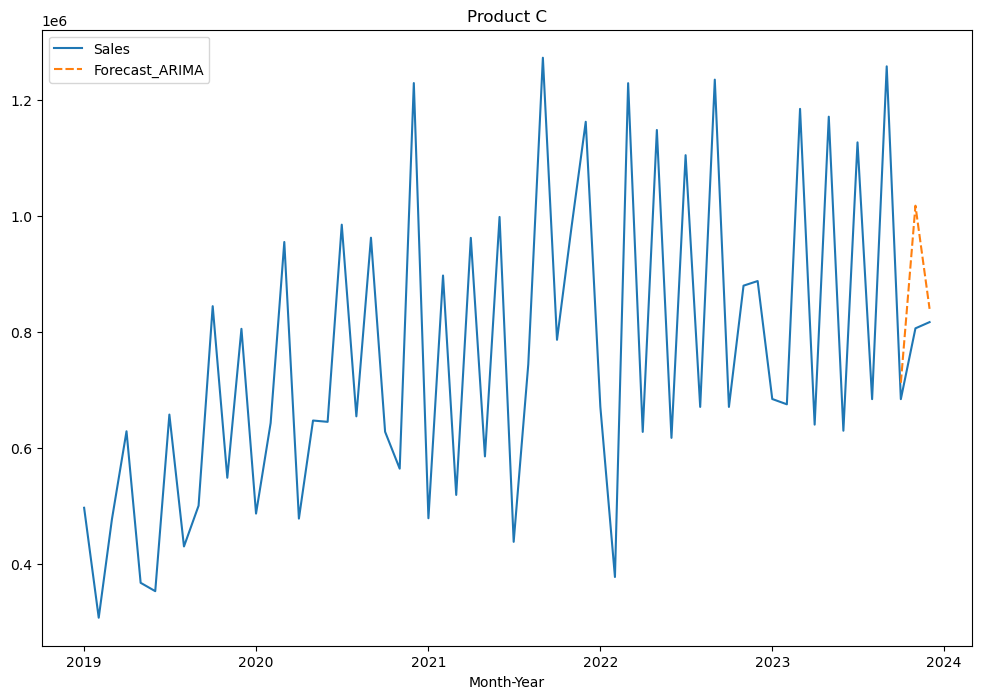

In [24]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMA']])
plt.title('Product C')
plt.show()

In [25]:
mae_arima= mean_absolute_error(test,pred)
mse_arima=mean_squared_error(test, pred)
mape_arima= mean_absolute_percentage_error(test,pred)
rmse_arima= np.sqrt(mean_squared_error(test,pred))

print(f'MAE - ARIMA: {mae_arima}')
print(f'MAPE - ARIMA: {mape_arima}')
print(f'MSE - ARIMA: {mse_arima}')
print(f'RMSE - ARIMA: {rmse_arima}')

MAE - ARIMA: 87643.7116435696
MAPE - ARIMA: 0.11067281101866115
MSE - ARIMA: 15394167593.82444
RMSE - ARIMA: 124073.23480035667


# SARIMA

In [26]:
import statsmodels.api as sm

In [27]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_b['Sales'], label='Original Series')
#axes[0].plot(sales_b['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_b['Sales'], label='Original Series')
#axes[1].plot(sales_b['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product B', fontsize=16)
#plt.show()

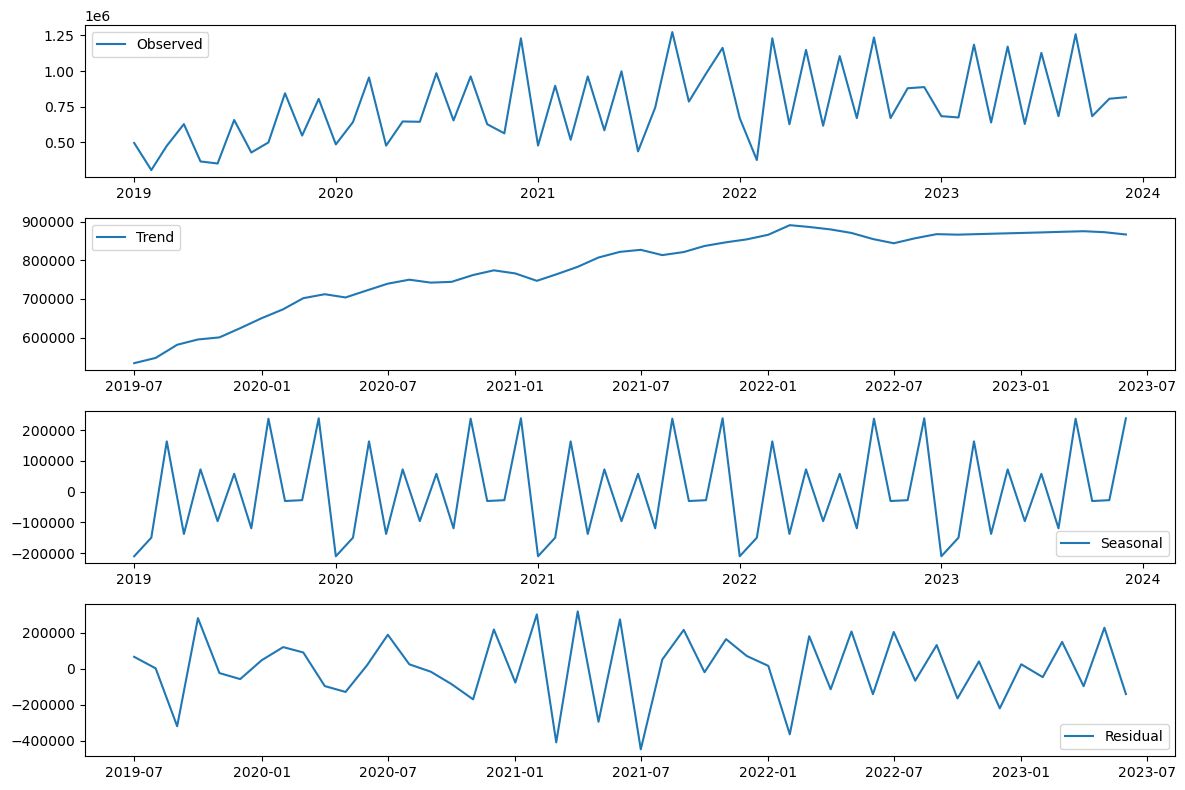

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

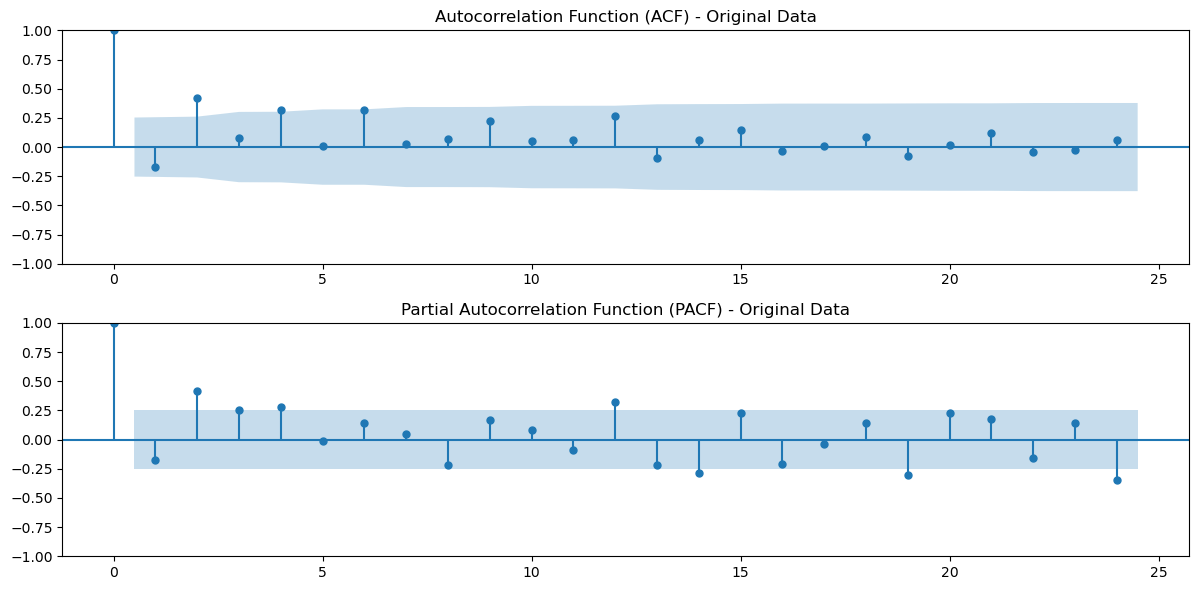

In [29]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [31]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(2, 0, 1), seasonal_order=(P, 0, Q, 12))
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=57, end=59, dynamic=True)
        mae = mean_absolute_error(test, pred)
        mse = mean_squared_error(test, pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])

In [32]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic            mae           mse
3   1  0  1574.760628  1584.975884   79821.355472  1.144744e+10
1   0  1  1575.445507  1585.660764   72824.104071  1.143792e+10
4   1  1  1575.790228  1588.048536  121339.662712  1.693495e+10
6   2  0  1575.878650  1588.136958  118385.154155  1.694322e+10
0   0  0  1576.022949  1584.195154   96231.396926  1.673458e+10
2   0  2  1576.406629  1588.664936  104260.047563  1.622071e+10
9   3  0  1577.611285  1591.912644  124193.833713  1.786605e+10
5   1  2  1577.701170  1592.002528  127918.978188  1.858326e+10
7   2  1  1577.717518  1592.018877  127431.876932  1.843587e+10
12  4  0  1579.549341  1595.893752  110115.942465  1.528459e+10
10  3  1  1579.565879  1595.910289  114649.092872  1.607172e+10
8   2  2  1579.654118  1595.998528  126883.701260  1.836021e+10
13  4  1  1581.545459  1599.932921  111241.806945  1.550434e+10
11  3  2  1581.553907  1599.941368  111769.020414  1.557271e+10
14  4  2  1583.533279  1603.963792  1106

In [33]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(2, 0, 1),seasonal_order=(1,0,0,12))
sarima_model=sarima.fit()

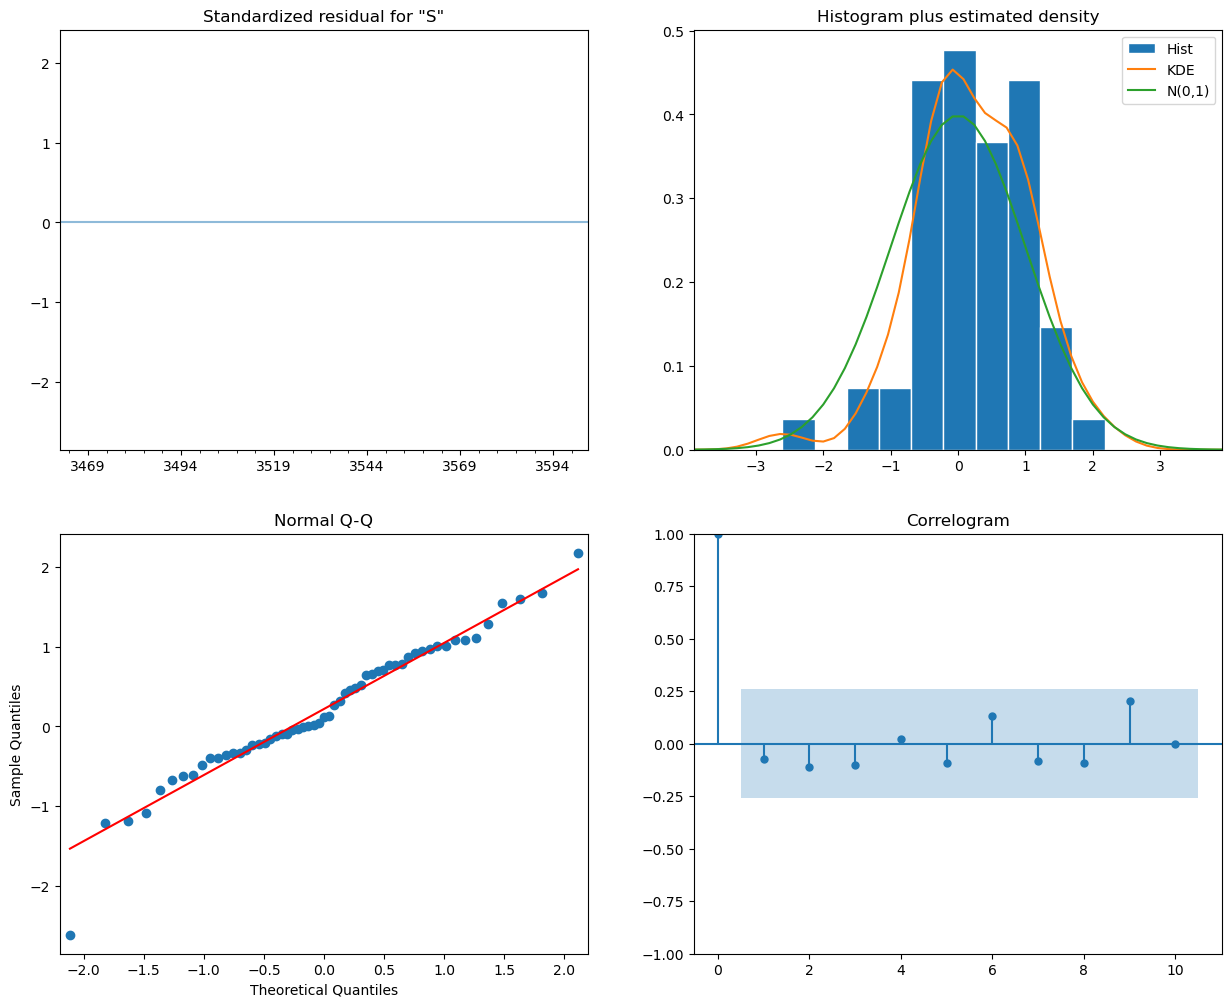

In [34]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [35]:
forecast_test_sarima=sarima_model.predict(start=57,end=59,dynamic=True)

In [36]:
sales_c['Forecast_SARIMA']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

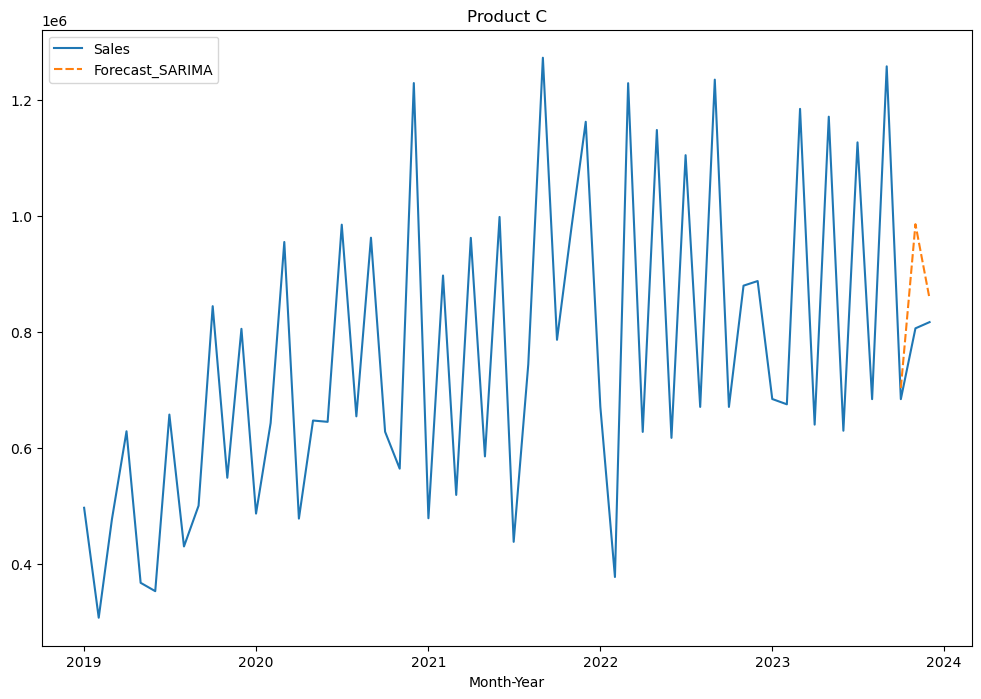

In [37]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMA']])
plt.title('Product C')

In [38]:
mae_sarima= mean_absolute_error(test,forecast_test_sarima)
mape_sarima= mean_absolute_percentage_error(test,forecast_test_sarima)
mse_sarima=mean_squared_error(test, forecast_test_sarima)
rmse_sarima= np.sqrt(mean_squared_error(test,forecast_test_sarima))

print(f'MAE - SARIMA: {round(mae_sarima,3)}')
print(f'MAPE - SARIMA: {round(mape_sarima,3)}')
print(f'MSE - SARIMA: {round(mse_sarima,3)}')
print(f'RMSE - SARIMA: {round(rmse_sarima,3)}')

MAE - SARIMA: 79821.355
MAPE - SARIMA: 0.1
MSE - SARIMA: 11447438407.534
RMSE - SARIMA: 106992.703


# AUTO-ARIMA

In [40]:
import pmdarima as pm

In [41]:
auto_arima= pm.auto_arima(train, start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1591.453, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1589.188, Time=0.05 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1590.668, Time=0.11 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1592.001, Time=0.49 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1593.038, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1591.175, Time=0.13 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1592.638, Time=0.18 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1593.932, Time=0.93 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1593.552, Time=0.14 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1592.584, Time=0.28 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1594.639, Time=0.23 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1595.867, Time=2.45 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1594.476, Time=0.72 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1594.252, Time=1.30 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=1596.271, Time=1.20

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [47]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   57
Model:             SARIMAX(4, 0, 0)x(0, 0, [1], 12)   Log Likelihood                -781.371
Date:                              Thu, 09 May 2024   AIC                           1576.742
Time:                                      16:10:43   BIC                           1591.043
Sample:                                  01-01-2019   HQIC                          1582.300
                                       - 09-01-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.652e+05   1.44e+05      2.529      0.011    8.21e+04    6.48e+05
ar.L1         -0.2803      0.163     -1.718      0.086      -0.600       0.040
ar.L2          0.3103      0.122      2.542      0.011       0.071       0.550
ar.L3          0.2350      0.123      1.916      0.055      -0.005       0.475
ar.L4          0.2494      0.151      1.654      0.098      -0.046       0.545
ma.S.L12       0.2308      0.165      1.395      0.163      -0.094       0.555
sigma2      4.527e+10      0.375   1.21e+11      0.000    4.53e+10    4.53e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.96   Prob(JB):                         0.88
Heteroskedasticity (H):               0.71   Skew:                            -0.11
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.34e+26. Standard errors may be unstable.
"""

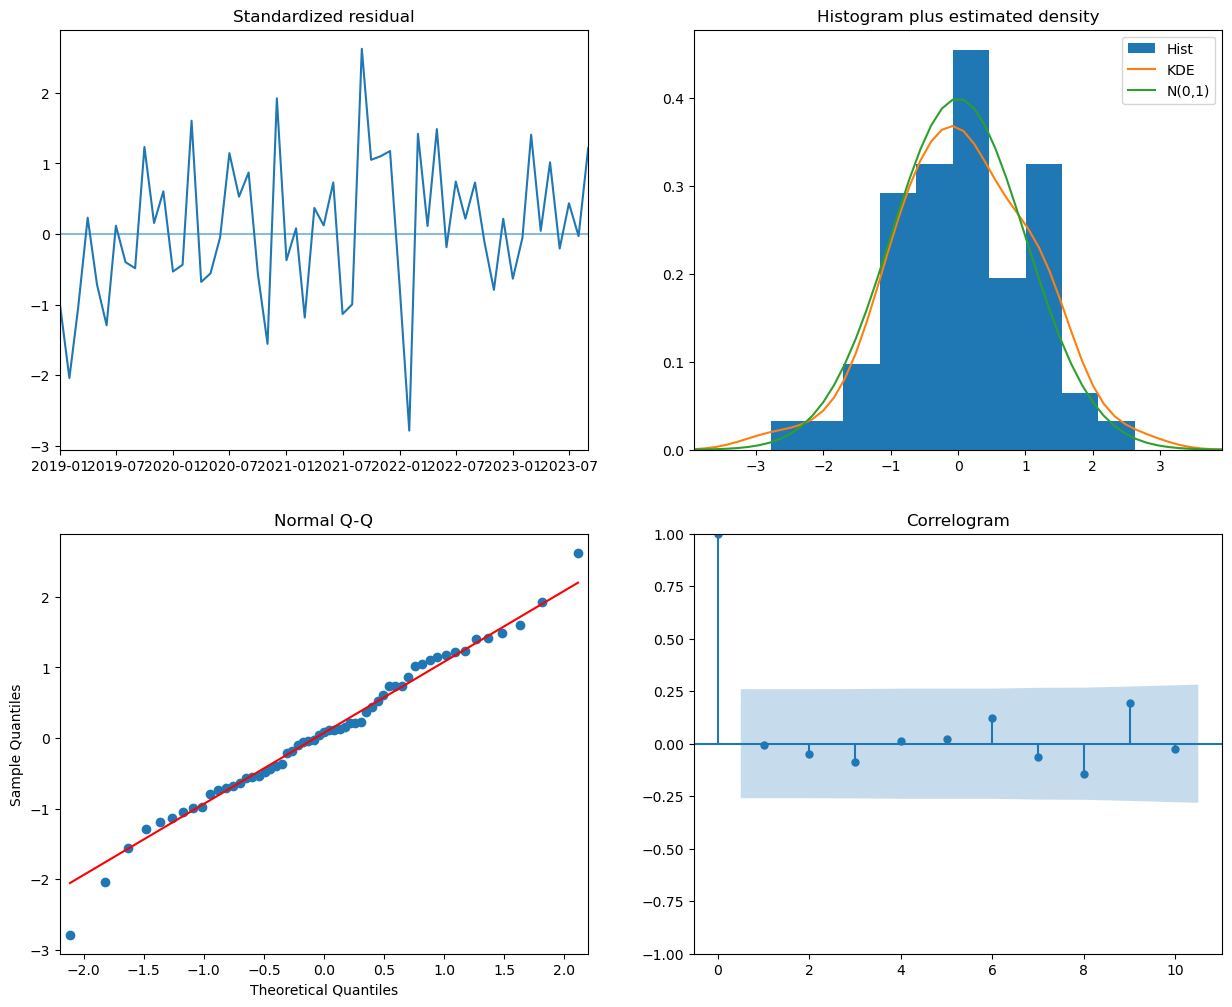

In [48]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [49]:
forecast_test_auto= auto_arima.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA']=[None]*len(train)+ list(forecast_test_auto)
#sales_c[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

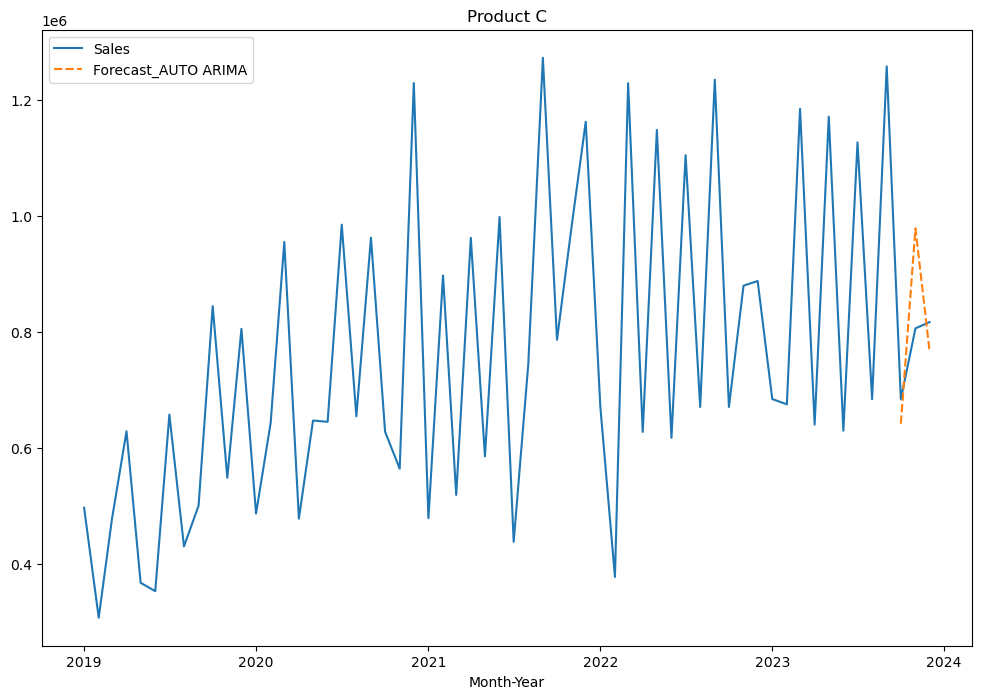

In [50]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA']])
plt.title('Product C')

In [51]:
mae_auto_arima= mean_absolute_error(test,forecast_test_auto)
mape_auto_arima= mean_absolute_percentage_error(test,forecast_test_auto)
mse_auto_arima=mean_squared_error(test,forecast_test_auto)
rmse_auto_arima= np.sqrt(mean_squared_error(test,forecast_test_auto))

print(f'MAE - AUTO ARIMA: {mae_auto_arima}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima}')

MAE - AUTO ARIMA: 88485.257522695
MAPE - AUTO ARIMA: 0.11261807119709082
MSE - AUTO ARIMA: 11392703197.673473
RMSE - AUTO ARIMA: 106736.60664305135


In [94]:
sales_c.tail(12)

,Sales,Forecast_ARIMA,Forecast_SARIMA,Forecast_AUTO ARIMA
Month-Year,,,,
2023-01-01,684175,NaN,NaN,NaN
2023-02-01,675038,NaN,NaN,NaN
2023-03-01,1185258,NaN,NaN,NaN
2023-04-01,639923,NaN,NaN,NaN
2023-05-01,1171761,NaN,NaN,NaN
2023-06-01,629400,NaN,NaN,NaN
2023-07-01,1127413,NaN,NaN,NaN
2023-08-01,683935,NaN,NaN,NaN
2023-09-01,1258717,NaN,NaN,NaN


In [95]:
sales_c.mean()

Sales                  7.599849e+05
Forecast_ARIMA         8.566874e+05
Forecast_SARIMA        9.177575e+05
Forecast_AUTO ARIMA    1.039155e+06
dtype: float64

In [96]:
data = {
    'model': ['ARIMA', 'AUTO ARIMA', 'SEASONAL ARIMA'],
    'MAE': [mae_arima, mae_auto_arima, mae_sarima],  
    'MAPE': [mape_arima, mape_auto_arima, mape_sarima],  
    'MSE': [mse_arima, mse_auto_arima, mse_sarima],  
    'RMSE': [rmse_arima, rmse_auto_arima, rmse_sarima]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMA,87643.711644,0.110673,1.539417e+10,124073.234800
AUTO ARIMA,270111.647435,0.347187,7.989771e+10,282661.838321
SEASONAL ARIMA,148713.803657,0.189655,2.628327e+10,162121.161743


# TESTING

In [19]:
auto_arima_1= pm.auto_arima(train, start_p=0, d=None, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12)
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1610.067, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1610.011, Time=0.05 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1612.005, Time=0.22 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1610.048, Time=0.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1611.772, Time=0.22 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1613.725, Time=0.54 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1612.042, Time=0.12 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1613.699, Time=0.47 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1571.642, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1569.970, Time=0.06 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1571.531, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1572.979, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [20]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -767.092
Date:                            Wed, 08 May 2024   AIC                           1544.183
Time:                                    18:40:58   BIC                           1554.310
Sample:                                01-01-2019   HQIC                          1548.109
                                     - 09-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.049e+04   1.24e+04      2.461      0.014    6203.738    5.48e+04
ar.L1         -0.6203      0.151     -4.102      0.000      -0.917      -0.324
ma.L1         -0.7229      0.120     -6.005      0.000      -0.959      -0.487
ma.S.L12       0.2271      0.195      1.164      0.244      -0.155       0.610
sigma2      5.044e+10      0.009   5.74e+12      0.000    5.04e+10    5.04e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.26
Prob(Q):                              0.91   Prob(JB):                         0.07
Heteroskedasticity (H):               0.80   Skew:                            -0.48
Prob(H) (two-sided):                  0.63   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.78e+27. Standard errors may be unstable.
"""

In [21]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test))
sales_c['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product C')

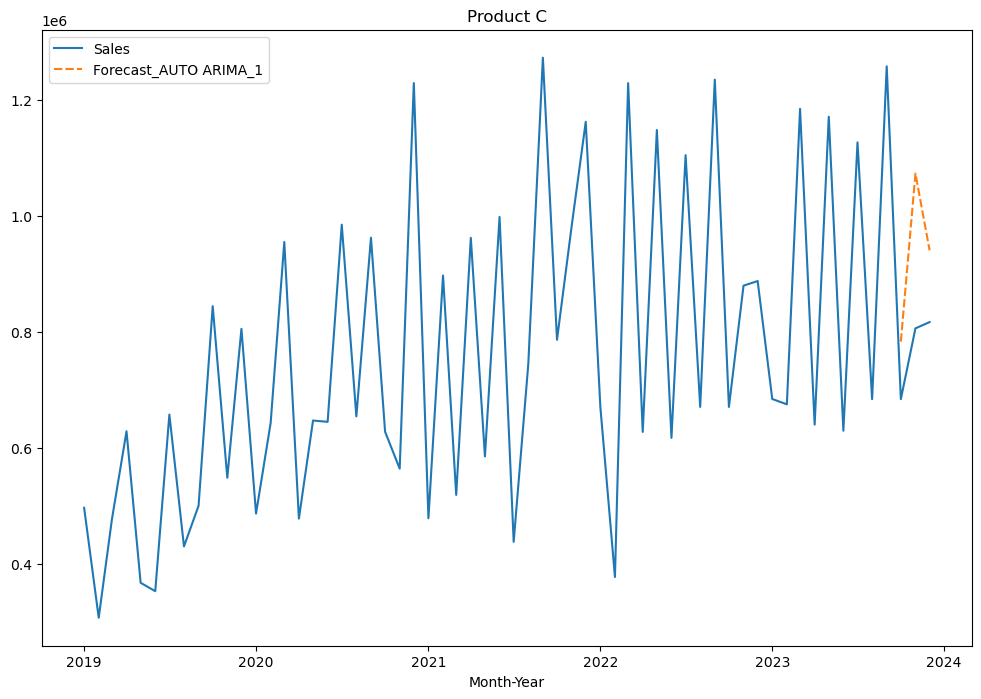

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product C')

In [23]:
mae_auto_arima_1= mean_absolute_error(test,forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test,forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test,forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test,forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 163634.39910508957
MAPE - AUTO ARIMA: 0.20963615720392428
MSE - AUTO ARIMA: 32265144013.510834
RMSE - AUTO ARIMA: 179625.00943218023
